In [3]:
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
import scipy as sp

<IPython.core.display.Javascript object>


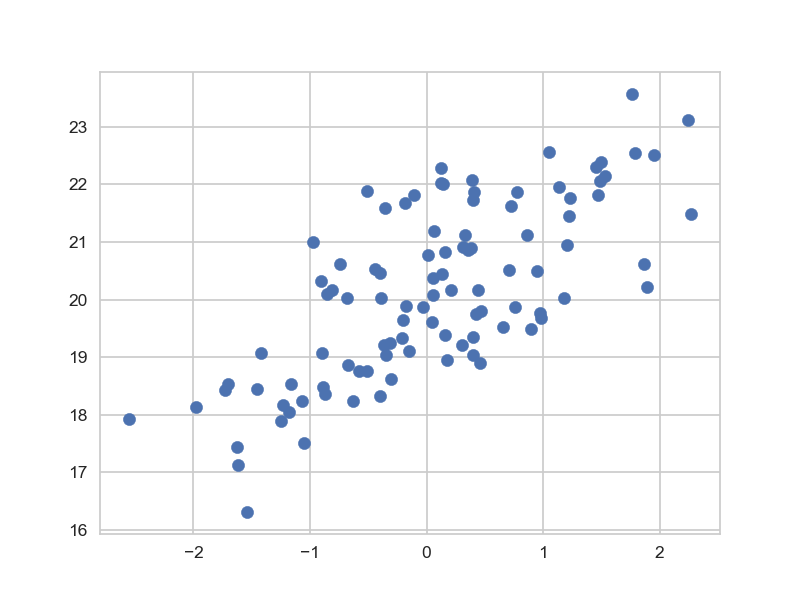

In [1]:
def make_regression2(n_samples, bias, noise, random_state):
    np.random.seed(random_state)
    
    X = np.random.randn(n_samples)
    e = sp.stats.norm(0, noise).rvs(n_samples)
    w = np.random.rand()
    
    y = bias + w*X + e
    
    return X, y, w

X, y, w = make_regression2(100, 20, 1, 0)
y

plt.scatter(X, y)
plt.show()

## 오그멘테이션

In [22]:
X0, y, coef = make_regression(n_samples=100, n_features=2, 
                             bias=100, noise=10, coef=True, random_state=1)

In [23]:
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [24]:
X = np.hstack([np.ones((X0.shape[0], 1)), X0])
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

In [25]:
X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

## OLS

In [4]:
bias = 100
X0, y, coef = make_regression(n_samples=100, n_features=1, bias=100, noise=10,
                             coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)


print(coef)
print(bias)

80.71051956187792
100


In [5]:
# OLS 해를 직접 이용하는 방법
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
w

array([[102.02701439],
       [ 81.59750943]])

In [6]:
#lstsq 명령을 이용하는 방법
w = np.linalg.lstsq(X, y)[0]
w

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([[102.02701439],
       [ 81.59750943]])

<IPython.core.display.Javascript object>


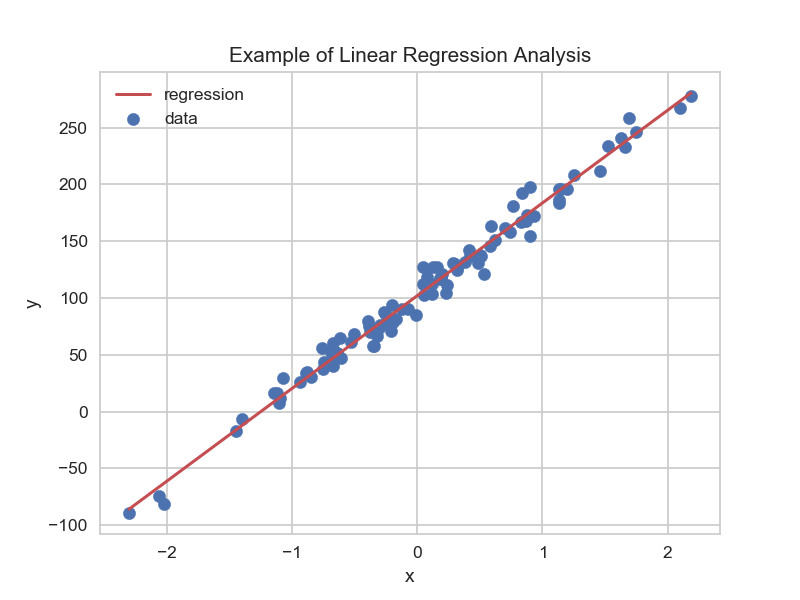

In [8]:
x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new)  # 오그멘테이션
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example of Linear Regression Analysis")
plt.legend()
plt.show()

In [30]:
X0, y, coef = make_regression(n_samples=100, n_features=1,
                              bias=100, noise=10, coef=True, random_state=1)

In [31]:
dfX0 = pd.DataFrame(X0)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y)

In [32]:
model = sm.OLS(dfy, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     6149.
Date:                Tue, 06 Mar 2018   Prob (F-statistic):           3.10e-90
Time:                        16:42:17   Log-Likelihood:                -362.92
No. Observations:                 100   AIC:                             729.8
Df Residuals:                      98   BIC:                             735.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.0270      0.923    110.510      0.0

In [33]:
dfy_new = result.predict(dfX)

In [34]:
x_new = np.array([[1,1]])
y_new = result.predict(x_new)
y_new

array([183.62452382])

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 06 Mar 2018   Prob (F-statistic):          6.95e-135
Time:                        16:42:18   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

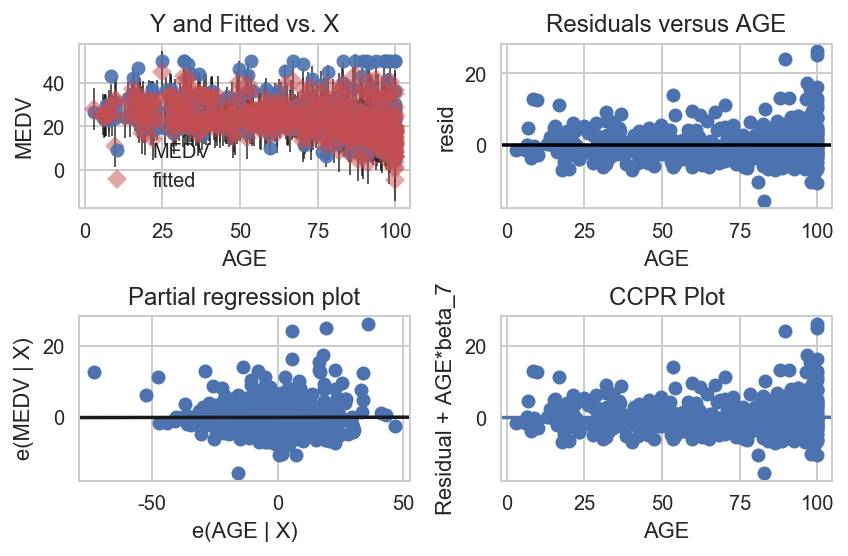

In [35]:
boston = load_boston()
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

fig = sm.graphics.plot_regress_exog(result_boston2, "AGE")
fig.suptitle("")
plt.show()

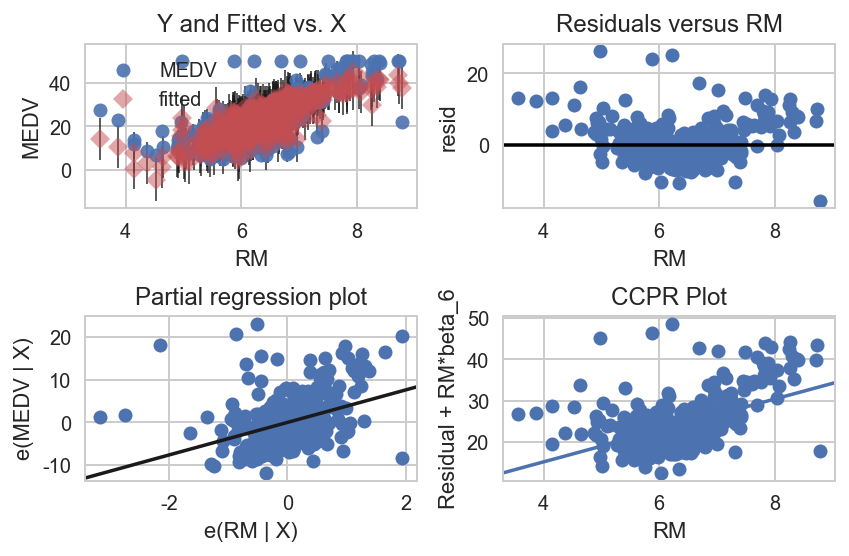

In [36]:
fig = sm.graphics.plot_regress_exog(result_boston2, "RM")
fig.suptitle("")
plt.show()